<a href="https://colab.research.google.com/github/alcoholsky/DAP__/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality 데이터분석
학번 201812638 이름 박찬승

이번에 제가 조사한 데이터는 Water Quality로 물의 상태에 대한 데이터를 조사하고 분석했습니다. 처음에는 Heart Attack Prediction데이터를 사용하려고 했으나 데이터분석을 진행하는 도중에 제가 사용하기에는 조금 어려워서 데이터를 Water Quality로 바꾸게 됐습니다.

데이터에 있는 여러가지 Attributes를 비교하여 마실수있는 물과 마실수없는 물를 비교하고 

각각 Attributes간의 상관관계가 있는지 알아보겠습니다.
또한 이번 학기에 배운 각각의 머신러닝을 사용하여 마실 수 있는 물과 마실 수 없는 물을 구분해주는 머신러닝을 만들어보겠습니다. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터불러오기
kaggle에서 다운받은 csv파일을 github에 올리고 그걸 읽는 식으로 데이터를 불러왔습니다.

다음으로 Attributes에 대해 설명해드릴려고합니다.
* 1번은 ph로 물의 산성도를 뜻합니다.

*   2번은 Hardness로 물의 경도(경도란 물 100cc속에 산화칼슘 1mg이 함유된 물을 경도 1도)를 뜻합니다.

*   3번은 Solids로 물 속에 여라가지 있는 불순물을 뜻합니다.
*   4번은 Chloramines로 물속에 염소와 암모니아화합물이 반응하여 만들어진 화합물입니다.
*   5번은 Sulfate로 황산염을 뜻합니다.
*   6번은 Conductivity로 전도도를 뜻합니다.
*   7번은 Organic_carbon로 물 속에 있는 유기탄소들이 함량를 뜻합니다.

*   8번은 Trihalomethanes로 염소소독으로 인해 생성되는 물질을 뜻합니다.
*   9번은 Turbidity로 탁도를 뜻합니다.


*   10번은 Potability로 마실수있는지의 여부를 뜻합니다.(마실수있으면 1 마실수없으면 0)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alcoholsky/DAP__/main/water_potability.csv')
df

ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]

# 데이터에 존재하는 결측값찾아보기
데이터에 존재하는 결측값에 대해서 먼저 알아봤습니다.
ph, Sulfate, Trihalomethanes 총 3곳에서 결측값이 발견됐습니다.

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Attributes간의 Correlation
Attributes간의 Correlation이 높은곳이 있다면 결측치에 적용하기위해 Correlation을 확인해봤습니다. 확인한 결과 다른 방식으로 결측치를 채워줘야할것같습니다.

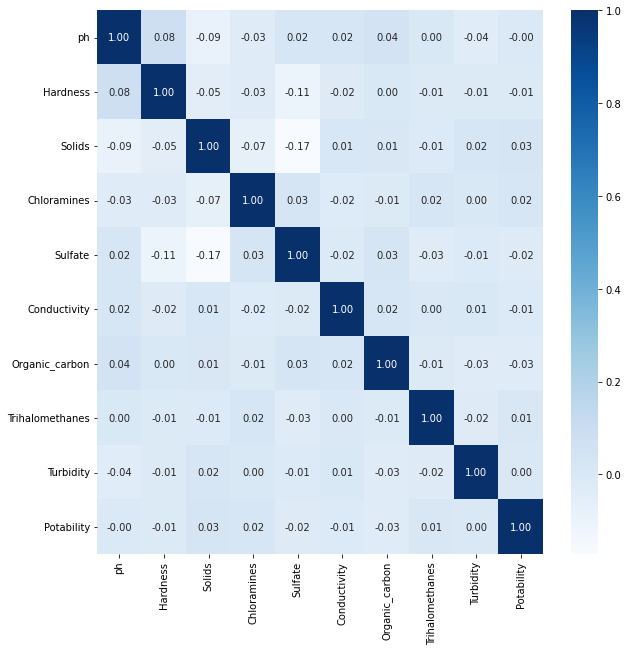

In [5]:
df_corr=df.corr()
plt.figure(figsize=(10, 10))
ax=sns.heatmap(df_corr,annot=True, fmt=".2f" ,cmap='Blues')


결측치는 최빈값으로 채워주기로 했습니다.

In [20]:
df_fre=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_fre.fit(df)
nmdf=pd.DataFrame(df_fre.transform(df),columns=df.columns)
nmdf


ph    Hardness  ...  Turbidity  Potability
0     0.000000  204.890455  ...   2.963135         0.0
1     3.716080  129.422921  ...   4.500656         0.0
2     8.099124  224.236259  ...   3.055934         0.0
3     8.316766  214.373394  ...   4.628771         0.0
4     9.092223  181.101509  ...   4.075075         0.0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821         1.0
3272  7.808856  193.553212  ...   2.798243         1.0
3273  9.419510  175.762646  ...   3.298875         1.0
3274  5.126763  230.603758  ...   4.708658         1.0
3275  7.874671  195.102299  ...   2.309149         1.0

[3276 rows x 10 columns]

총 마실 수 있는 물의 수 와 마실 수 없는 물의 수를 bar plot으로 나타내봤습니다.
그 후 pie plot으로 그려봤습니다.

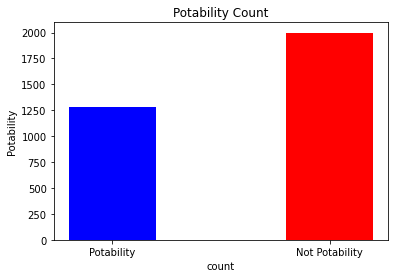

In [21]:
xpor=['Potability','Not Potability']
ypor=[df['Potability'].value_counts()[1],df['Potability'].value_counts()[0]]
colors=['blue','red']
plt.bar(xpor,ypor,color=colors,width=0.4)
plt.xlabel("count")
plt.ylabel("Potability")
plt.title("Potability Count")
plt.show()

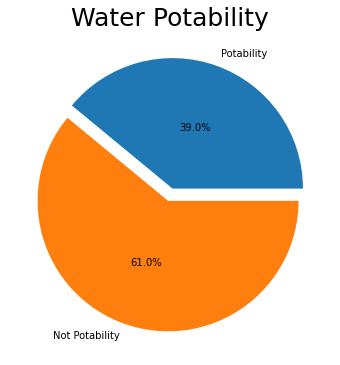

In [22]:
fig, ax= plt.subplots(figsize=(6,6))
explode1=(0.05,0.05)
ax.pie(ypor,labels=xpor,explode = explode1,autopct='%1.1f%%',pctdistance=0.5)
plt.title("Water Potability",fontsize=25)
plt.show()

마실수있는 물과 마실수 없는 물을 분리하여 각 Attributes간의 평균을 비교해봤습니다.  마실 수 있는 물과 마실 수 없는 물의 평균은 매우 유사했습니다.

In [23]:
#마실수있는 물의 특성들의 평균
nmdf_1=nmdf.query("Potability==1")
nmdf_1_ph=round(nmdf_1['ph'].mean(),2)
nmdf_1_Ha=round(nmdf_1['Hardness'].mean(),2)
nmdf_1_Solids=round(nmdf_1['Solids'].mean(),2)
nmdf_1_Chloramines=round(nmdf_1['Chloramines'].mean(),2)
nmdf_1_Sulfate=round(nmdf_1['Sulfate'].mean(),2)
nmdf_1_Conductivity=round(nmdf_1['Conductivity'].mean(),2)
nmdf_1_Organic_carbon=round(nmdf_1['Organic_carbon'].mean(),2)
nmdf_1_Trihalomethanes=round(nmdf_1['Trihalomethanes'].mean(),2)
nmdf_1_Turbidity=round(nmdf_1['Turbidity'].mean(),2)
#마실수 없는 물의 특성들의 평균
nmdf_0=nmdf.query("Potability==0")
nmdf_0_ph=round(nmdf_0['ph'].mean(),2)
nmdf_0_Ha=round(nmdf_0['Hardness'].mean(),2)
nmdf_0_Solids=round(nmdf_0['Solids'].mean(),2)
nmdf_0_Chloramines=round(nmdf_0['Chloramines'].mean(),2)
nmdf_0_Sulfate=round(nmdf_0['Sulfate'].mean(),2)
nmdf_0_Conductivity=round(nmdf_0['Conductivity'].mean(),2)
nmdf_0_Organic_carbon=round(nmdf_0['Organic_carbon'].mean(),2)
nmdf_0_Trihalomethanes=round(nmdf_0['Trihalomethanes'].mean(),2)
nmdf_0_Turbidity=round(nmdf_0['Turbidity'].mean(),2)
print("마실수있는 물의 평균")                           
print("ph=",nmdf_1_ph)
print("Hardness=",nmdf_1_Ha)
print("Solids=",nmdf_1_Solids)
print("Chloramines =",nmdf_1_Chloramines)
print("Sulfate=",nmdf_1_Sulfate)
print("Conductivity=",nmdf_1_Conductivity)
print("Organic_carbon=",nmdf_1_Organic_carbon)
print("Trihalomethanes=",nmdf_1_Trihalomethanes)
print("Turbidity=",nmdf_1_Turbidity)
print("마실수없는 물의 평균")
print("ph=",nmdf_0_ph)
print("Hardness=",nmdf_0_Ha)
print("Solids=",nmdf_0_Solids)
print("Chloramines =",nmdf_0_Chloramines)
print("Sulfate=",nmdf_0_Sulfate)
print("Conductivity=",nmdf_0_Conductivity)
print("Organic_carbon=",nmdf_0_Organic_carbon)
print("Trihalomethanes=",nmdf_0_Trihalomethanes)
print("Turbidity=",nmdf_0_Turbidity)

마실수있는 물의 평균
ph= 6.09
Hardness= 195.8
Solids= 22383.99
Chloramines = 7.17
Sulfate= 285.9
Conductivity= 425.38
Organic_carbon= 14.16
Trihalomethanes= 63.71
Turbidity= 3.97
마실수없는 물의 평균
ph= 5.97
Hardness= 196.73
Solids= 21777.49
Chloramines = 7.09
Sulfate= 284.36
Conductivity= 426.73
Organic_carbon= 14.36
Trihalomethanes= 62.79
Turbidity= 3.97


그래서 각 특성들의 분포를 살펴봤습니다. 대부분의 분포가 비슷했습니다.

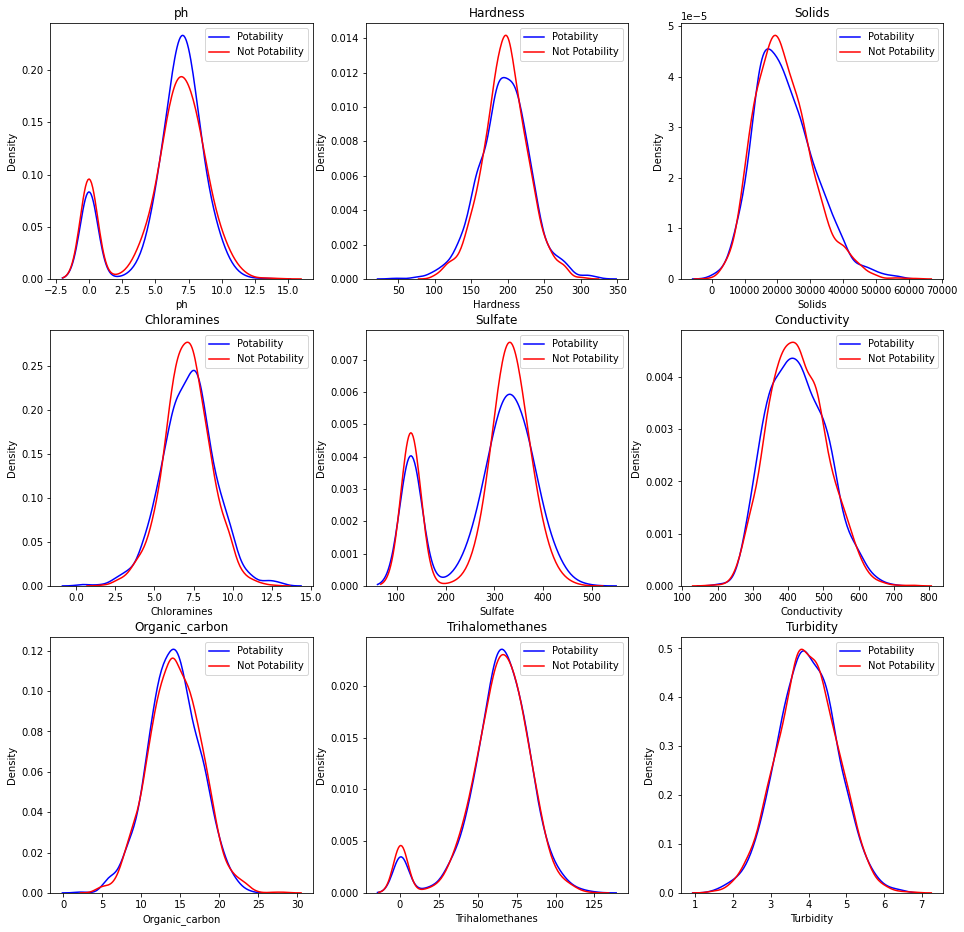

In [24]:
plt.figure(figsize=(16,16))

for a,b in enumerate(nmdf.columns[:9]):
  plt.subplot(3,3, a+1)
  plt.title(b)
  sns.kdeplot(x=nmdf_1[b],label="Potability",color="blue")
  sns.kdeplot(x=nmdf_0[b],label="Not Potability",color="red")
  plt.legend() 
 

데이터들간의 연관관계를 확인해보기 위해 pairplot을 사용해봤습니다. 대각선은 Potability와 Not Potability의 분포를 보여주고있습니다.

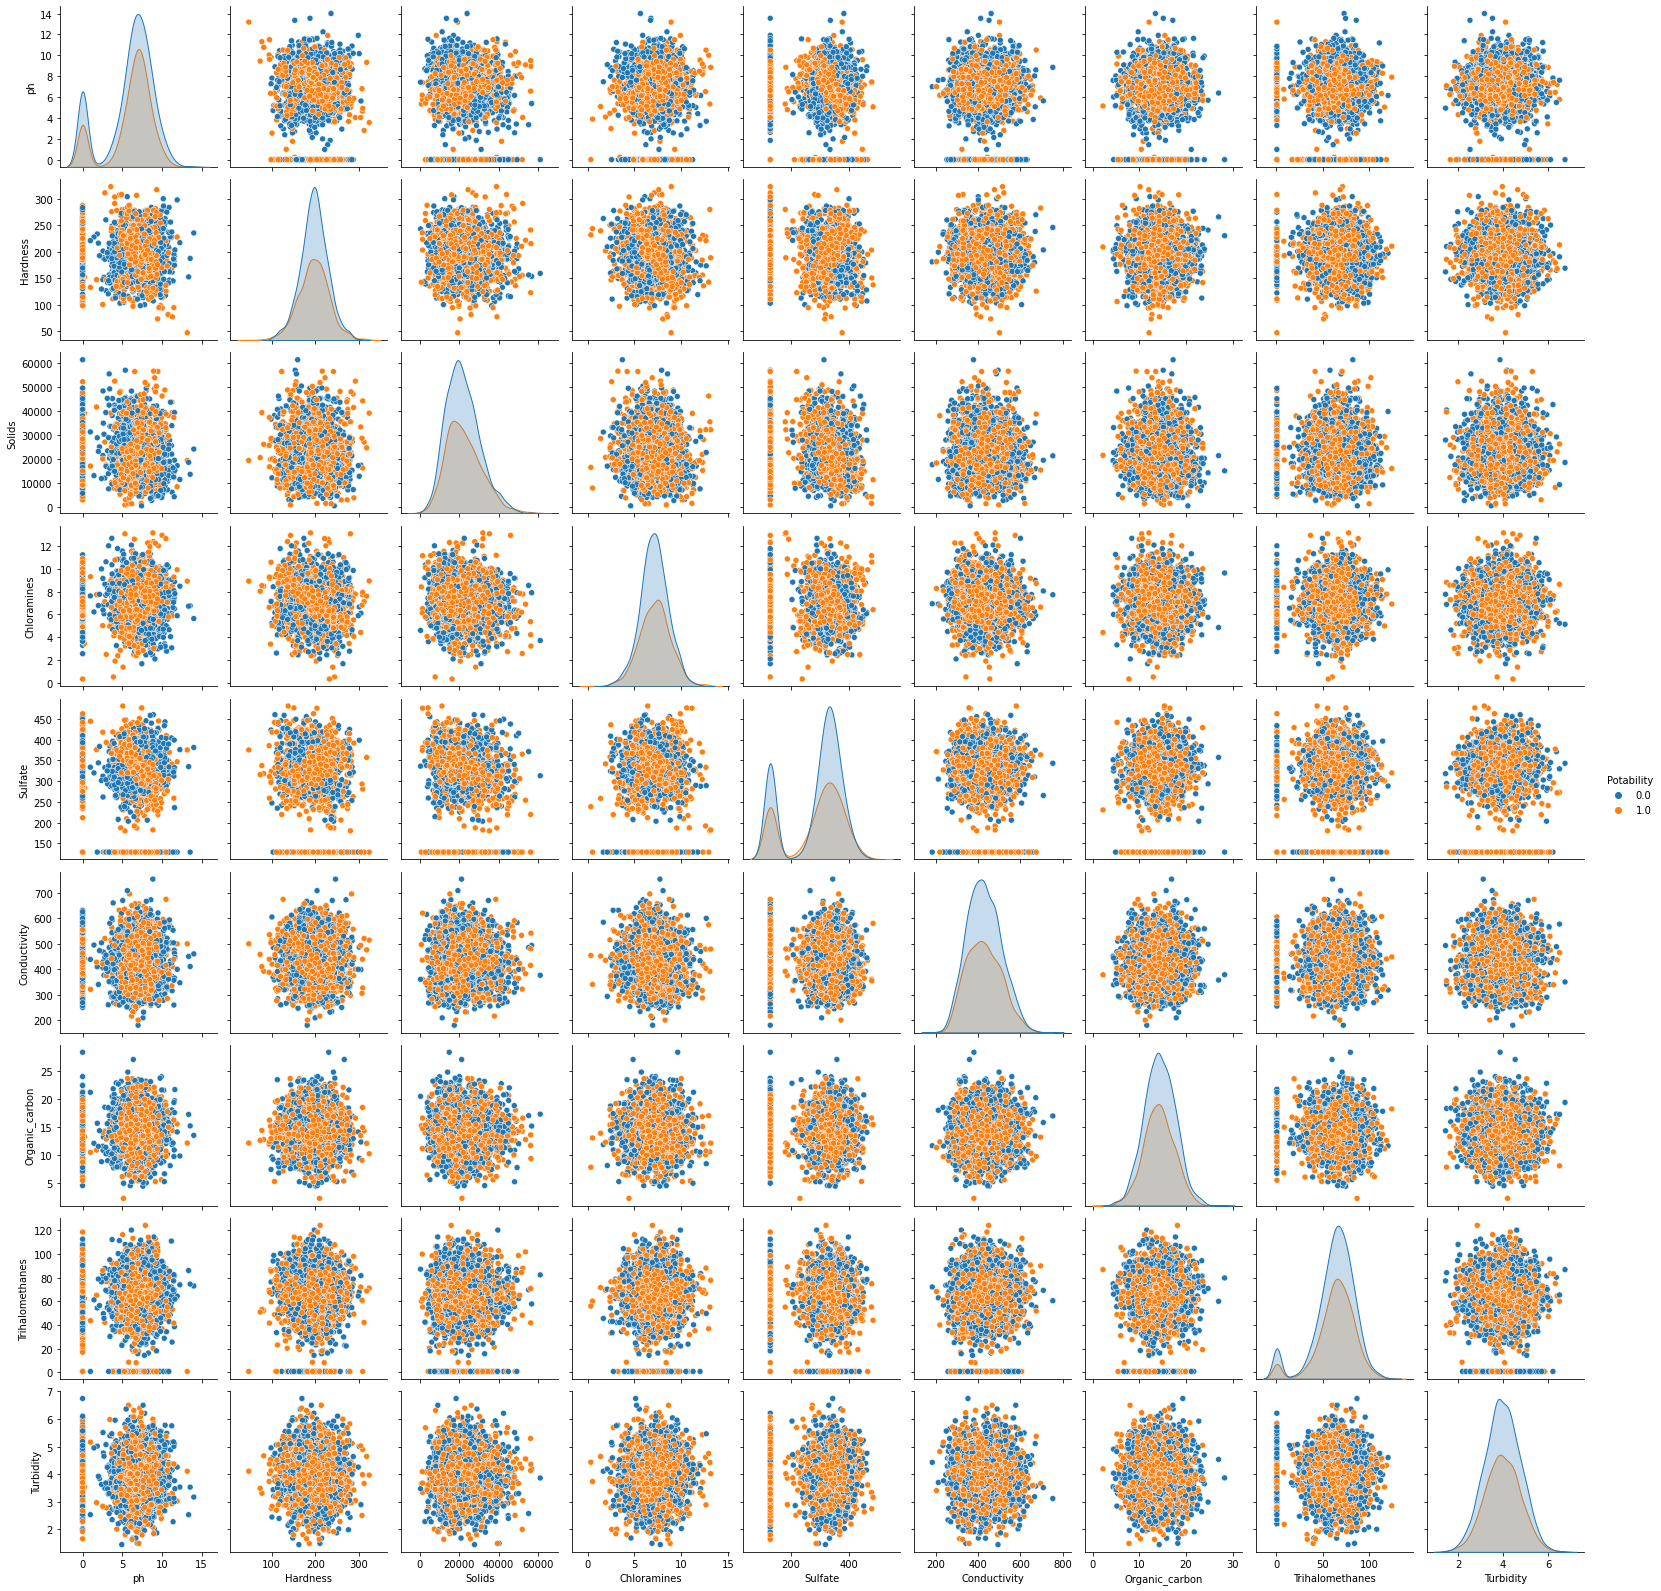

In [26]:
sns.pairplot(data=nmdf,hue="Potability")

혹시 Correlation이 제대로 나오지않는 이유가 scaling을 안해서 일수도있다고 생각해서 scaling을 하고 다시 Correlation을 해봤습니다.

In [27]:
stdScaler =StandardScaler()
df_filter=nmdf.filter(['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
dfStd = pd.DataFrame(stdScaler.fit_transform(df_filter),columns=df_filter.columns)
dfStd=dfStd.assign(Potability=nmdf['Potability'])
dfStd

ph  Hardness    Solids  ...  Trihalomethanes  Turbidity  Potability
0    -2.058835  0.259195 -0.139471  ...         1.122338  -1.286298         0.0
1    -0.787841 -2.036414 -0.385987  ...        -0.321069   0.684218         0.0
2     0.711270  0.847665 -0.240047  ...         0.153965  -1.167365         0.0
3     0.785709  0.547651  0.000493  ...         1.750822   0.848412         0.0
4     1.050935 -0.464429 -0.460249  ...        -1.466454   0.138786         0.0
...        ...       ...       ...  ...              ...        ...         ...
3271 -0.462226 -0.081758  2.916188  ...         0.166562   0.601124         1.0
3272  0.611991 -0.085667 -0.534295  ...        -2.938016  -1.497627         1.0
3273  1.162876 -0.626829  1.270810  ...         0.315211  -0.856007         1.0
3274 -0.305352  1.041355 -1.144058  ...         0.674996   0.950797         1.0
3275  0.634502 -0.038546 -0.525812  ...         0.731968  -2.124459         1.0

[3276 rows x 10 columns]

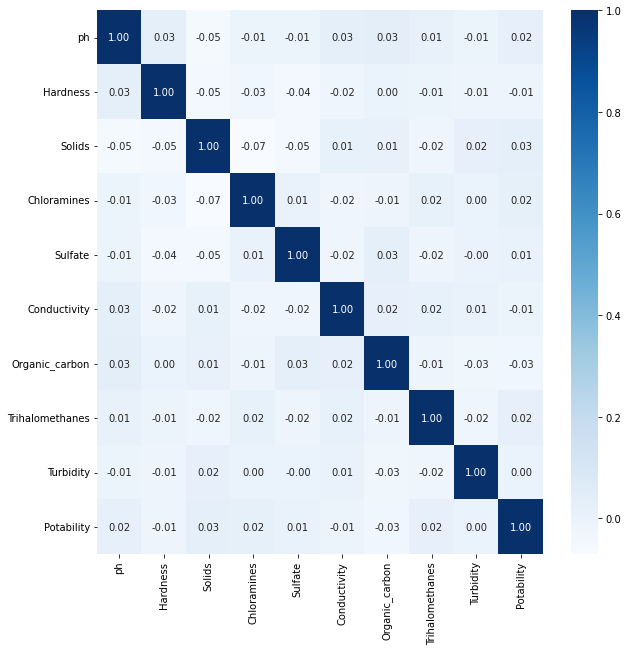

In [28]:
df_corr=dfStd.corr()
plt.figure(figsize=(10, 10))
ax=sns.heatmap(df_corr,annot=True, fmt=".2f" ,cmap='Blues')

scaling을 하고 데이터들간의 연관관계를 확인해보기 위해 pairplot을 사용해봤습니다. 

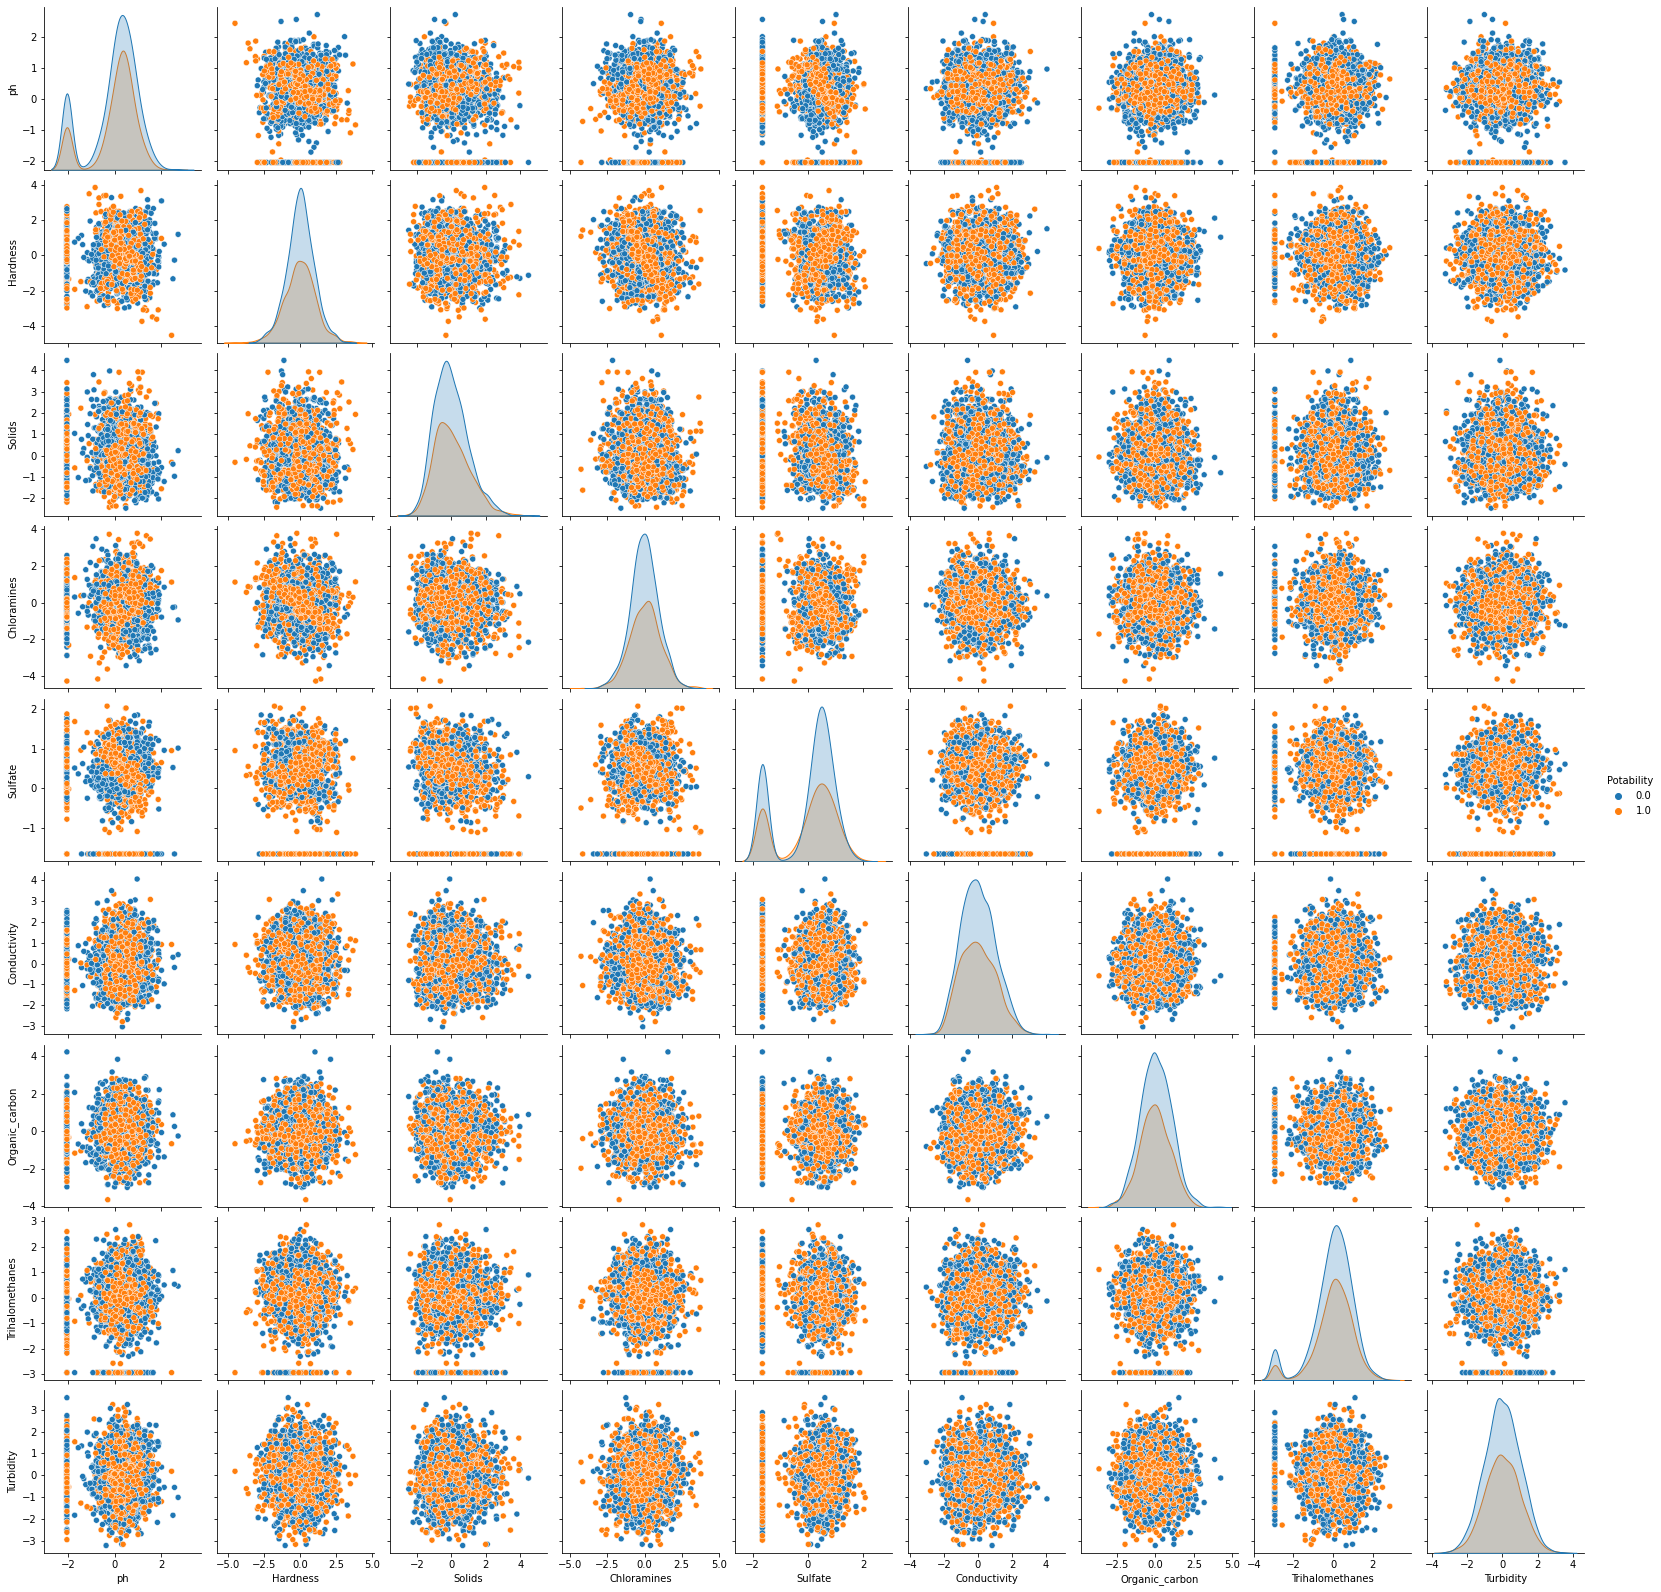

In [18]:
sns.pairplot(data=dfStd,hue="Potability")

이번에는 주어진 데이터를 사용하여 마실수있는 물과 마실수없는물을 구분해주는 머신러닝을 만들어보겠습니다.
우선 X_train을 0.7, X_test를 0.3으로 나눠줬습니다.

In [54]:
X=dfStd.filter(['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
y=dfStd.Potability
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30, random_state=0)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

Logistic Regression을 사용해서 만들어봤습니다.

In [56]:
logreg= LogisticRegression()

logreg.fit(X_train,y_train)

predictions=logreg.predict(X_test);

만든 Logistic Regression에 대해 평가해보겠습니다. Accyracy와 precision에서는 0.5이상이 나왔지만 recall과 f1에서는 0.1이하가 나왔습니다.

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accyracy: ",accuracy_score(y_test,predictions))
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1_score: ",f1_score(y_test,predictions))
print()
print(classification_report(y_test, predictions))

Accyracy:  0.6205493387589013
precision:  0.5
recall:  0.005361930294906166
f1_score:  0.010610079575596816

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       610
         1.0       0.50      0.01      0.01       373

    accuracy                           0.62       983
   macro avg       0.56      0.50      0.39       983
weighted avg       0.58      0.62      0.48       983



k-Nearest Neighbors Classifier을 사용해서 만들어봤습니다.
Accyracy는 Logistic Regression와 비슷하게 나왔고 precision에서는 0.4이상으로 Logistic Regression보다 살짝 아래로 나왔습니다. recall과 f1에서는 Logistic Regression에 비해 상당히 높게 나왔습니다.

In [71]:
from	sklearn.neighbors import	KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
predictions_kn=model.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_kn))
print("precision: ",precision_score(y_test,predictions_kn))
print("recall: ",recall_score(y_test,predictions_kn))
print("f1_score: ",f1_score(y_test,predictions_kn))
print()
print(classification_report(y_test, predictions_kn))

Accyracy:  0.6002034587995931
precision:  0.4681528662420382
recall:  0.3941018766756032
f1_score:  0.42794759825327505

              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69       610
         1.0       0.47      0.39      0.43       373

    accuracy                           0.60       983
   macro avg       0.57      0.56      0.56       983
weighted avg       0.59      0.60      0.59       983



Naive Bayes를 사용해서 만들어봤습니다. Accyracy는 Logistic Regression와 비슷하게 나왔고 precision에서는 0.5이상으로 Logistic Regression와 비슷하게 나왔습니다. recall과 f1에서는 k-Nearest Neighbors Classifie에 비해 낮게 나왔습니다.

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predictions_NB=model.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_NB))
print("precision: ",precision_score(y_test,predictions_NB))
print("recall: ",recall_score(y_test,predictions_NB))
print("f1_score: ",f1_score(y_test,predictions_NB))
print()
print(classification_report(y_test, predictions_NB))

Accyracy:  0.6225839267548321
precision:  0.5081967213114754
recall:  0.16621983914209115
f1_score:  0.2505050505050505

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75       610
         1.0       0.51      0.17      0.25       373

    accuracy                           0.62       983
   macro avg       0.57      0.53      0.50       983
weighted avg       0.59      0.62      0.56       983



DecisionTree를 사용해서 만들어봤습니다. Accyracy는 Logistic Regression와 비슷하게 나왔고 precision에서는 0.5 밑으로  나왔습니다. recall과 f1에서는 지금까지에서 가장 높게 나왔습니다.

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predictions_cl=clf.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_cl))
print("precision: ",precision_score(y_test,predictions_cl))
print("recall: ",recall_score(y_test,predictions_cl))
print("f1_score: ",f1_score(y_test,predictions_cl))
print()
print(classification_report(y_test, predictions_cl))

Accyracy:  0.5890132248219736
precision:  0.46035805626598464
recall:  0.48257372654155495
f1_score:  0.47120418848167533

              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       610
         1.0       0.46      0.48      0.47       373

    accuracy                           0.59       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.59      0.59      0.59       983



RandomForest를 사용해서 만들어봤습니다. 트리의 깊이는 5로 제한하고 20개의 트리를 통해 학습하도록 했습니다. Accyracy는 제일 높긴 하지만 비슷하게 나왔고 precision에서도 가장높은 0.7이 나왔습니다. recall과 f1에서는 Naive Bayes와 비슷하게 나왔습니다.

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=20,max_depth=5,random_state=0)
clf_rf.fit(X_train,y_train)
predictions_rf=clf_rf.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_rf))
print("precision: ",precision_score(y_test,predictions_rf))
print("recall: ",recall_score(y_test,predictions_rf))
print("f1_score: ",f1_score(y_test,predictions_rf))
print()
print(classification_report(y_test, predictions_rf))

Accyracy:  0.6571719226856562
precision:  0.7195121951219512
recall:  0.1581769436997319
f1_score:  0.2593406593406593

              precision    recall  f1-score   support

         0.0       0.65      0.96      0.78       610
         1.0       0.72      0.16      0.26       373

    accuracy                           0.66       983
   macro avg       0.69      0.56      0.52       983
weighted avg       0.68      0.66      0.58       983



이번에는 트리의 깊이는 그대로 300개의 트리를 통해 학습하도록 했습니다. Accyracy는 더 높게 나왔으며 precision에서도 더 나왔습니다. recall과 f1에서는 약간 더 낮게 나왔습니다

In [73]:
clf_rf = RandomForestClassifier(n_estimators=300,max_depth=5,random_state=0)
clf_rf.fit(X_train,y_train)
predictions_rf=clf_rf.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_rf))
print("precision: ",precision_score(y_test,predictions_rf))
print("recall: ",recall_score(y_test,predictions_rf))
print("f1_score: ",f1_score(y_test,predictions_rf))
print()
print(classification_report(y_test, predictions_rf))

Accyracy:  0.6602238046795524
precision:  0.8
recall:  0.13941018766756033
f1_score:  0.23744292237442924

              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78       610
         1.0       0.80      0.14      0.24       373

    accuracy                           0.66       983
   macro avg       0.73      0.56      0.51       983
weighted avg       0.71      0.66      0.58       983



이번에는 트리의 깊이를 20으로  300개의 트리를 통해 학습하도록 했습니다. Accyracy는 더 높게 나왔으며 precision에서는 0.8에서 0.66으로 낮게 나왔습니다. recall과 f1에서는 더 높게 나왔습니다

In [76]:
clf_rf = RandomForestClassifier(n_estimators=300,max_depth=20,random_state=0)
clf_rf.fit(X_train,y_train)
predictions_rf=clf_rf.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_rf))
print("precision: ",precision_score(y_test,predictions_rf))
print("recall: ",recall_score(y_test,predictions_rf))
print("f1_score: ",f1_score(y_test,predictions_rf))
print()
print(classification_report(y_test, predictions_rf))

Accyracy:  0.6846388606307223
precision:  0.6632124352331606
recall:  0.34316353887399464
f1_score:  0.4522968197879859

              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       610
         1.0       0.66      0.34      0.45       373

    accuracy                           0.68       983
   macro avg       0.68      0.62      0.62       983
weighted avg       0.68      0.68      0.65       983



이번에는 트리의 깊이를 100으로 2000개의 트리를 통해 학습하도록 했습니다. Accyracy는 비슷하게 나왔으며 precision에서는 0.65로 300개의 트리와 깊이가 5일때랑 비슷하게 나왔습니다. recall과 f1에서도 비슷하게 나왔습니다

In [81]:
clf_rf = RandomForestClassifier(n_estimators=2000,max_depth=100,random_state=0)
clf_rf.fit(X_train,y_train)
predictions_rf=clf_rf.predict(X_test)
print("Accyracy: ",accuracy_score(y_test,predictions_rf))
print("precision: ",precision_score(y_test,predictions_rf))
print("recall: ",recall_score(y_test,predictions_rf))
print("f1_score: ",f1_score(y_test,predictions_rf))
print()
print(classification_report(y_test, predictions_rf))

Accyracy:  0.6846388606307223
precision:  0.6598984771573604
recall:  0.3485254691689008
f1_score:  0.456140350877193

              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78       610
         1.0       0.66      0.35      0.46       373

    accuracy                           0.68       983
   macro avg       0.68      0.62      0.62       983
weighted avg       0.68      0.68      0.66       983



지금까지 여러가지 머신러닝을 통해 데이터를 분석하고 평가해봤습니다. Accyracy가 중요할때는 RandomForest를 사용하는게 좋을것같습니다. 또한 precision도  RandomForest를 사용하는게 좋을것같습니다. recall과 f1에서는 DecisionTree를 사용하는게 좋을것같습니다. 종합적으로 봤을때는 이 데이터에서는 RandomForest가 제일 적합한것 같습니다. 

지금까지 201812638 박찬승이였습니다.